<a href="https://colab.research.google.com/github/Arisarayangyoo/Big-DATA/blob/main/Data_Preprocessing_67_653020606_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing
### Data Preprocessing, Data Visualization, Data Analysis

ชื่อ:
นางสาวอริสรา ยังอยู่ 653020606-3

กำหนดส่ง: อาทิตย์ 8 กันยายน 2567 (NO EXTENSION!)

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลเบื้องต้นด้วยการสร้าง Data Visualization และ Pivot Tables

**สิ่งที่ต้องมีในการทำงานนี้**
* มีการติดตั้ง Python ในเครื่องคอมพิวเตอร์

**Python libraries ที่ใช้ในงานนี้:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

In [ ]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip3 install numpy
"""
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Titanic Data Set
* (10 points) ข้อมูล Titanic เป็นหนึ่งในชุดข้อมูลที่ได้รับความนิยมมากที่สุดในแวดวงการเรียนรู้การวิเคราะห์ข้อมูลและการสร้างโมเดลทางสถิติหรือการเรียนรู้ของเครื่อง (Machine Learning) ชุดข้อมูลนี้มาจากเหตุการณ์เรือ Titanic ซึ่งเป็นเรือสำราญที่ใหญ่ที่สุดในยุคนั้น และเกิดอับปางในปี 1912 ทำให้มีผู้เสียชีวิตจำนวนมาก
    ข้อมูลนี้ประกอบด้วยรายละเอียดของผู้โดยสารบนเรือ Titanic เช่น อายุ เพศ ชั้นที่นั่ง (Pclass) ค่าโดยสาร (Fare) จำนวนญาติพี่น้องหรือคู่สมรสบนเรือ (SibSp) และสถานที่ขึ้นเรือ (Embarked) โดยมีเป้าหมายหลักในการวิเคราะห์หรือการสร้างโมเดลคือการทำนายว่าผู้โดยสารคนนั้นจะรอดชีวิต (Survived) หรือไม่จากการอับปางของเรือ Titanic \
    https://www.kaggle.com/datasets/vinicius150987/titanic3/data

<center><img src="https://www.pigeonforgetncabins.com/wp-content/uploads/2015/06/experience-at-titanic-pigeon-forge.jpg" alt="titanic" width="400"/></center>

In [ ]:
# reading data sets from Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os
path = '/content/drive/MyDrive/Data/'
data_file_path = os.path.join(path,'Titanic3.xlsx')
titanic = pd.read_excel(data_file_path)
titanic.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### (10 points) จากข้อมูลที่ให้มา มีค่าว่างสูญหายมากน้อยแค่ไหน? และมีค่าผิดปกติ (outliers) และหรือข้อมูลรบกวน (noisy data) หรือไม่ในแต่ละตัวแปร?

In [ ]:
#มีค่าว่างทั้งหมด 3,855 ค่า
missing_values = titanic.isnull().sum()
print(missing_values)
total_missing = missing_values.sum()
print(f"\nมีค่าว่างทั้งหมด {total_missing} ค่า")

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

มีค่าว่างทั้งหมด 3855 ค่า


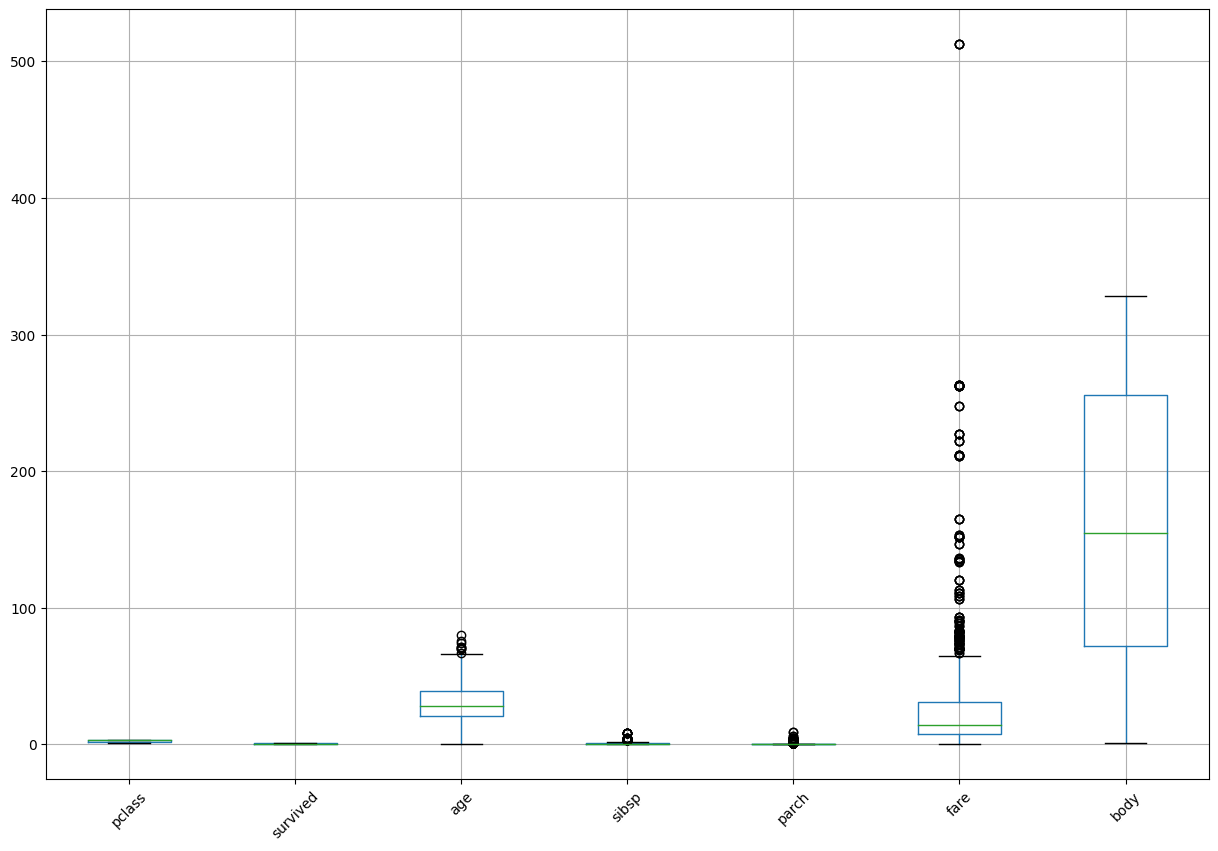

In [ ]:
#มีค่าผิดปกติ (outliers) หรือข้อมูลรบกวน (noisy data) ในตัวเเปร age, sibsp, parch	และ	fare

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
titanic.boxplot()
plt.xticks(rotation=45)
plt.show()


In [ ]:
 #มีค่า outlier กี่ค่า

import numpy as np
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

outlier_counts = {}
for col in titanic.select_dtypes(include=np.number):
    outlier_counts[col] = count_outliers_iqr(titanic[col])

print("Number of outliers in each column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

total_outliers = sum(outlier_counts.values())
print(f"\nTotal number of outliers: {total_outliers} ค่า")

Number of outliers in each column:
pclass: 0
survived: 0
age: 9
sibsp: 57
parch: 307
fare: 171
body: 0

Total number of outliers: 544 ค่า


### (10 points) จากข้อมูลที่ให้มา เตรียมข้อมูลให้พร้อมโดยการจัดการกับค่าว่างในข้อมูล ให้อธิบายวิธีที่ท่านเลือกใช้ พร้อมยกเหตุผลประกอบ

In [ ]:
# การจัดการกับค่าว่างในข้อมูลโดย

# Age เติมด้วยค่าเฉลี่ย เพราะตัวแปรอายุมีความหลากหลายเราไม่สามารถเจาะจงกลุ่มอายุที่ขึ้นเรือได้ การใช้ค่าเฉลี่ยจึงมีความเหมาะสมที่สุด
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

# Embarked เติมด้วยฐานนิยม เพราะการที่มีคนขึ้นเรือที่จุดนั้นมากที่สุด ก็สามารถอุปมานได้ว่าคนที่เหลือส่วนใหญ่ก็อาจจะขึ้นเรือจุดนั้นด้วยเช่นกัน
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Fare เติมด้วยค่าเฉลี่ย เพราะมีเพียงข้อมูลเดียวที่หายไป การใช้ค่าเฉลี่ยจะเหมาะสมกว่าในการประมาณค่าโดยสาร
titanic['fare'].fillna(titanic['fare'].mean(), inplace=True)

# Cabin เติมด้วยค่า "Unknown" เพราะไม่สามารถประมาณค่า cabin ได้ เนื่องจากไม่มีข้อมูลอ้างอิงที่ชัดเจน
titanic['cabin'].fillna("Unknown", inplace=True)

# Boat เติมด้วยค่า "Unknown" เพราะไม่สามารถประมาณค่า boat ได้ เนื่องจากไม่มีข้อมูลอ้างอิงที่ชัดเจน
titanic['boat'].fillna("Unknown", inplace=True)

# Body เติมด้วยค่า "Unknown" เพราะไม่สามารถประมาณค่า body ได้ เนื่องจากไม่มีข้อมูลอ้างอิงที่ชัดเจน
titanic['body'].fillna("Unknown", inplace=True)

# Home.dest เติมด้วยค่า "Unknown" เพราะไม่สามารถประมาณค่า home.dest ได้ เนื่องจากไม่มีข้อมูลอ้างอิงที่ชัดเจน
titanic['home.dest'].fillna("Unknown", inplace=True)

titanic.head()

<ipython-input-89-d1f5a05a112c>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  titanic['body'].fillna("Unknown", inplace=True)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,Unknown,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,Unknown,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,Unknown,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON"


### แปลงข้อมูลเชิงคุณภาพให้เป็นตัวเลข

*   i. (10 points) ใช้ one-hot encoding ในการแปลงตัวแปร Embarked
*   ii. (10 points) แปลงตัวแปร Sex โดยให้เพศชายเป็น 0 และเพศหญิงเป็น 1
*   iii. (10 points) สร้างตัวแปร FamilySize ซึ่งเป็นผลรวมของตัวแปร SibSp (number of siblings/spouses aboard) และ Parch (number of parents/children aboard)
* iv. (10 points) สร้างตัวแปร IsAlone ซึ่งมีค่าเป็น 1 ถ้า FamilySize เป็น 0, และมีค่าเป็นศูนย์เมื่อเป็นอื่น

In [ ]:
#ใช้ one-hot encoding ในการแปลงตัวแปร Embarked

import pandas as pd
embarked_encoded = pd.get_dummies(titanic['embarked'], prefix='embarked')
titanic = pd.concat([titanic, embarked_encoded], axis=1)
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,Unknown,"St Louis, MO",False,False,True
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True


In [ ]:
# แปลงตัวแปร Sex โดยให้เพศชายเป็น 0 และเพศหญิงเป็น 1

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,Unknown,"St Louis, MO",False,False,True
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True


In [ ]:
#สร้างตัวแปร FamilySize ซึ่งเป็นผลรวมของตัวแปร SibSp (number of siblings/spouses aboard) และ Parch (number of parents/children aboard)

titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,FamilySize
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,Unknown,"St Louis, MO",False,False,True,0
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3


In [ ]:
# สร้างตัวแปร IsAlone ซึ่งมีค่าเป็น 1 ถ้า FamilySize เป็น 0, และมีค่าเป็นศูนย์เมื่อเป็นอื่น

import numpy as np
titanic['IsAlone'] = np.where(titanic['FamilySize'] == 0, 1, 0)
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,FamilySize,IsAlone
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,Unknown,"St Louis, MO",False,False,True,0,1
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True,3,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0


### ทำการ Normalize ข้อมูล
* i. (10 points) ตัวแปร Fare และ Age ใช้ Min-Max Scaling \
* ii. (10 points) สร้างตัวแปรใหม่ Fare_Per_Person ด้วยการนำตัวแปร Fare มาหารด้วย FamilySize + 1 \
* iii. (10 points) สร้างตัวแปร AgeGroup ที่ระบุกลุ่มอายุของตัวอย่าง โดยแบ่งเป็นกลุ่มดังนี้ [0, 12), [12, 18), [18, 50) และ [50, 100)

In [ ]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [ ]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), [0,2,5,8])

[(0, 2], (5, 8], (2, 5], (2, 5], (5, 8], (2, 5]]
Categories (3, interval[int64, right]): [(0, 2] < (2, 5] < (5, 8]]

In [ ]:
#ตัวแปร Fare และ Age ใช้ Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
titanic[['fare', 'age']] = scaler.fit_transform(titanic[['fare', 'age']])
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,FamilySize,IsAlone
0,1,1,"Allen, Miss. Elisabeth Walton",1,0.361169,0,0,24160,0.412503,B5,S,2,Unknown,"St Louis, MO",False,False,True,0,1
1,1,1,"Allison, Master. Hudson Trevor",0,0.009395,1,2,113781,0.295806,C22 C26,S,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0
2,1,0,"Allison, Miss. Helen Loraine",1,0.022964,1,2,113781,0.295806,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,0.373695,1,2,113781,0.295806,C22 C26,S,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True,3,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0.311064,1,2,113781,0.295806,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0


In [ ]:
# สร้างตัวแปรใหม่ Fare_Per_Person ด้วยการนำตัวแปร Fare มาหารด้วย FamilySize + 1

titanic['Fare_Per_Person'] = titanic['fare'] / (titanic['FamilySize'] + 1)
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,FamilySize,IsAlone,Fare_Per_Person
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,Unknown,"St Louis, MO",False,False,True,0,1,211.3375
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,37.8875
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,37.8875
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,37.8875
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,37.8875


In [ ]:
#สร้างตัวแปร AgeGroup ที่ระบุกลุ่มอายุของตัวอย่าง โดยแบ่งเป็นกลุ่มดังนี้ [0, 12), [12, 18), [18, 50) และ [50, 100)

import pandas as pd
titanic['AgeGroup'] = pd.cut(titanic['age'], bins=[0, 12, 18, 50, 100], labels=['[0, 12)', '[12, 18)', '[18, 50)', '[50, 100)'])
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,FamilySize,IsAlone,Fare_Per_Person,AgeGroup
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,...,2,Unknown,"St Louis, MO",False,False,True,0,1,211.3375,"[18, 50)"
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,...,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,37.8875,"[0, 12)"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,...,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,37.8875,"[0, 12)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,...,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,37.8875,"[18, 50)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,...,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,37.8875,"[18, 50)"


### (10 points) นำเสนอการแจกแจงหรือทำความเข้าใจตัวแปรสำคัญในข้อมูล เช่น Age, Fare, and Pclass ด้วยการสร้างฮิสโตแกรมหรือแผนภาพกล่อง

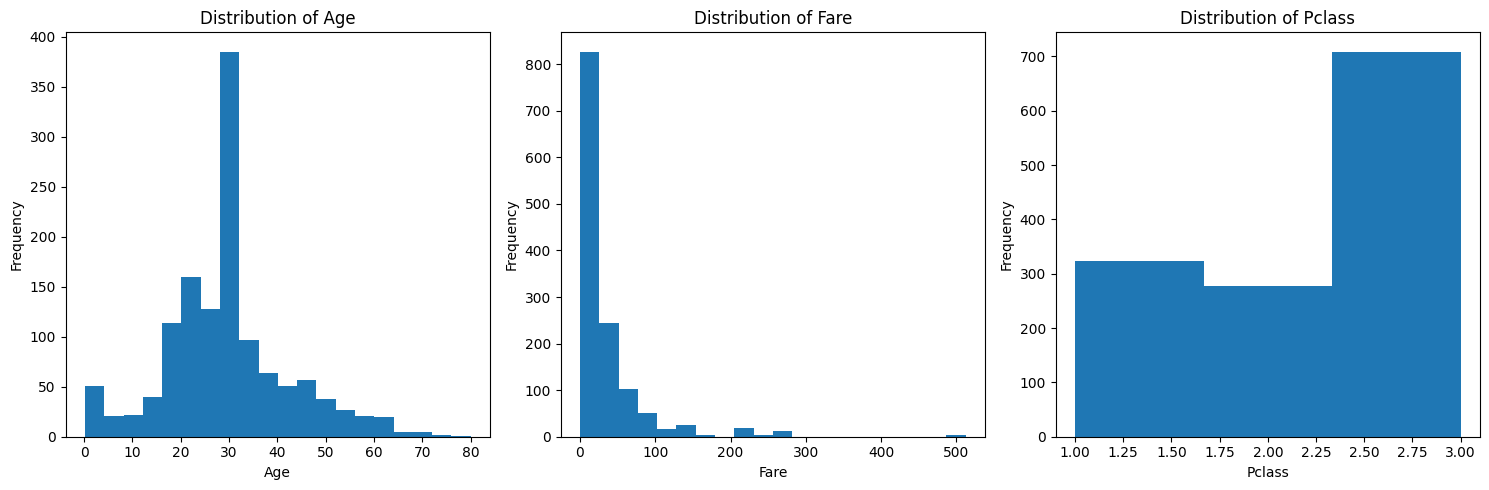

In [ ]:
# Histograms for Age, Fare, and Pclass

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(titanic['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
plt.hist(titanic['fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')

plt.subplot(1, 3, 3)
plt.hist(titanic['pclass'], bins=3)
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title('Distribution of Pclass')

plt.tight_layout()
plt.show()

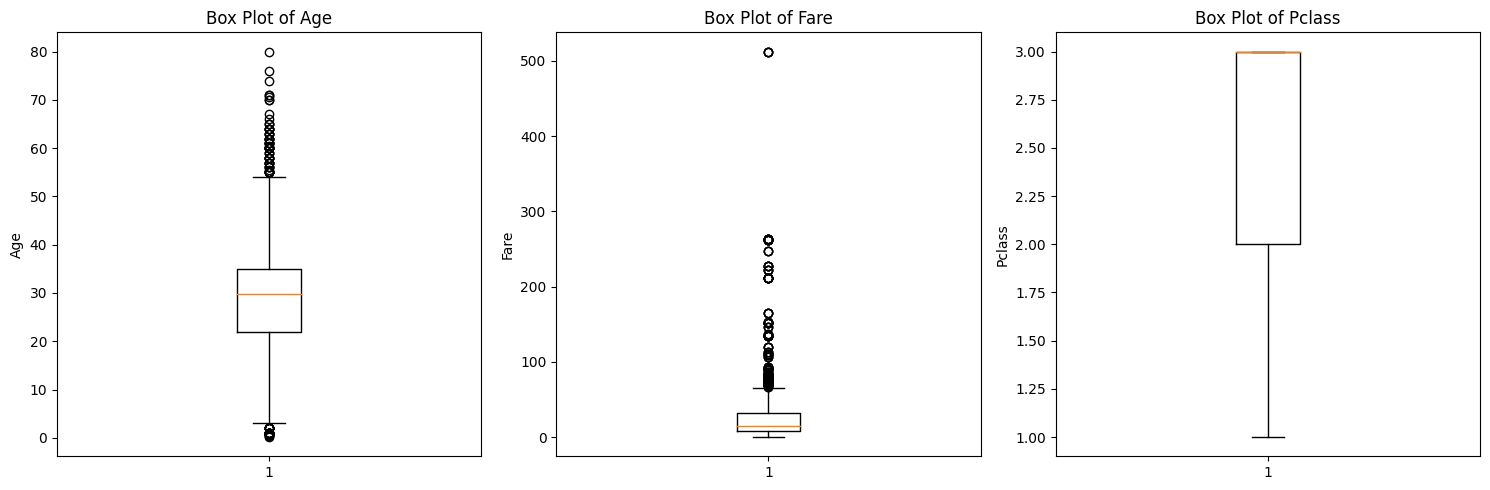

In [ ]:
# Box plots for Age, Fare, and Pclass
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(titanic['age'])
plt.ylabel('Age')
plt.title('Box Plot of Age')

plt.subplot(1, 3, 2)
plt.boxplot(titanic['fare'])
plt.ylabel('Fare')
plt.title('Box Plot of Fare')

plt.subplot(1, 3, 3)
plt.boxplot(titanic['pclass'])
plt.ylabel('Pclass')
plt.title('Box Plot of Pclass')

plt.tight_layout()
plt.show()


### เมื่อเตรียมข้อมูลพร้อมแล้ว ให้หาความสัมพันธ์ของตัวแปรต่อไปนี้จากข้อมูล ซึ่งอาจนำเสนอด้วยสถิติและแผนภูมิหรือกราฟก็ได้:
*   i. (10 points) survived และ pclass
*   ii. (10 points) survived และ sex
*   iii. (10 points) survived และ age
*   iv. (10 points) จำนวนสมาชิกครอบครัวที่รอดชีวิต และ Fare

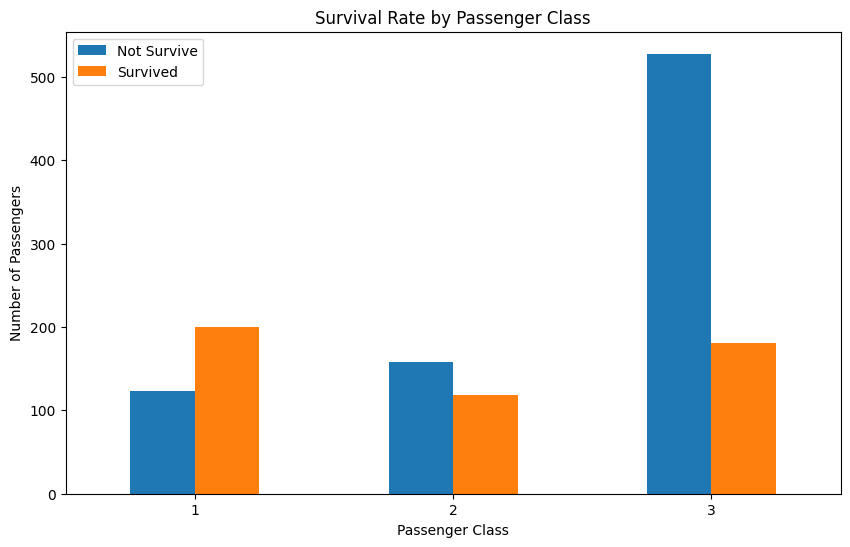

In [ ]:
# หาความสัมพันธ์ survived และ pclass

survived_pclass_counts = titanic.groupby(['pclass', 'survived'])['survived'].count().unstack()
survived_pclass_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(['Not Survive', 'Survived'])
plt.show()


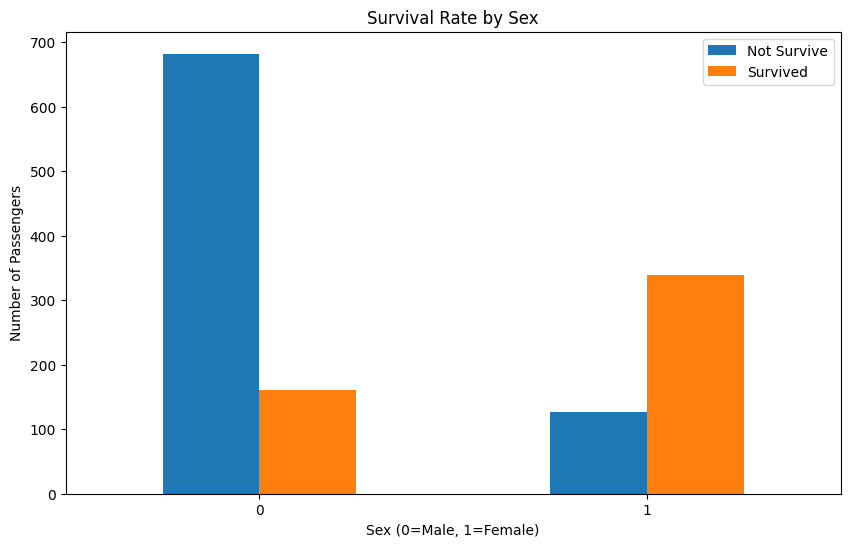

In [ ]:
#หาความสัมพันธ์ survived และ sex

survived_sex_counts = titanic.groupby(['sex', 'survived'])['survived'].count().unstack()
survived_sex_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0=Male, 1=Female)')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(['Not Survive', 'Survived'])
plt.show()


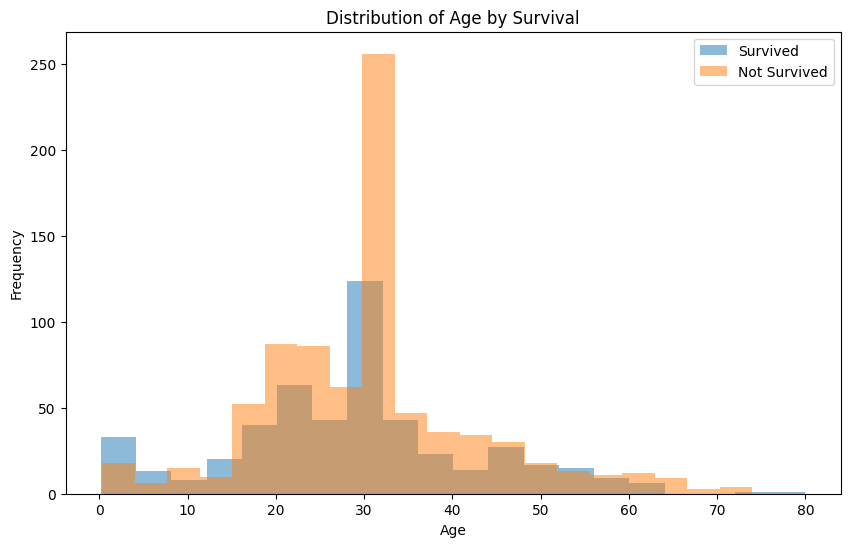

In [ ]:
# หาความสัมพันธ์ survived และ age hitrogram

plt.figure(figsize=(10, 6))
plt.hist(titanic[titanic['survived'] == 1]['age'], bins=20, alpha=0.5, label='Survived')
plt.hist(titanic[titanic['survived'] == 0]['age'], bins=20, alpha=0.5, label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Survival')
plt.legend()
plt.show()


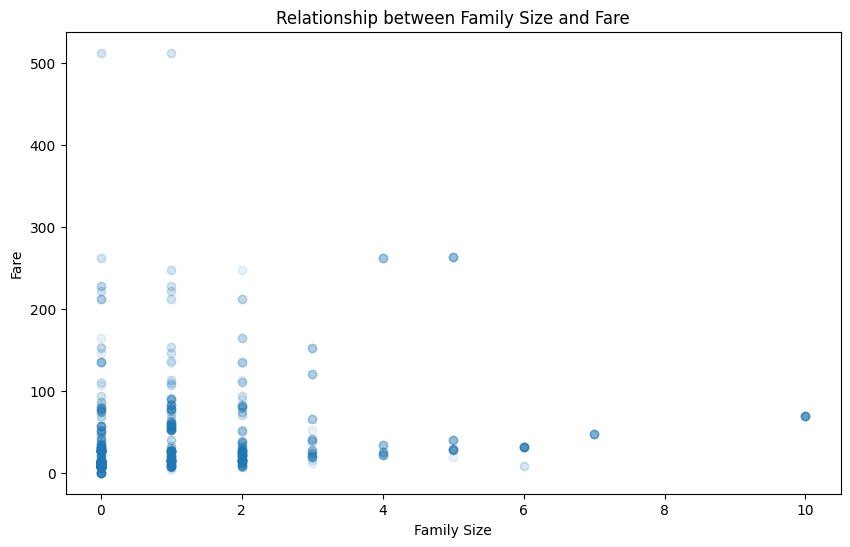

In [ ]:
# หาความสัมพันธ์ จำนวนสมาชิกครอบครัวที่รอดชีวิต และ Fare

plt.figure(figsize=(10, 6))
plt.scatter(titanic['FamilySize'], titanic['fare'],alpha=0.1)
plt.xlabel('Family Size')
plt.ylabel('Fare')
plt.title('Relationship between Family Size and Fare')
plt.show()


### (10 points) สร้างตารางสรุปข้อมูลเพื่อหาคุณลักษณะของผู้โดยสารเรือไททานิค และศึกษาเกี่ยวกับการเสียชีวิตของผู้โดยสาร ทำการสรุปผลที่ได้จากตาราง

In [ ]:
# สร้างตารางสรุปข้อมูลเพื่อหาคุณลักษณะของผู้โดยสารเรือไททานิค
summary_table = titanic.describe()
pd.options.display.float_format = '{:.4f}'.format
summary_table

,pclass,survived,sex,age,sibsp,parch,fare,FamilySize,IsAlone,Fare_Per_Person
count,1309.0000,1309.0000,1309.0000,1309.0000,1309.0000,1309.0000,1309.0000,1309.0000,1309.0000,1309.0000
mean,2.2949,0.3820,0.3560,29.8811,0.4989,0.3850,33.2955,0.8839,0.6035,20.5280
std,0.8378,0.4861,0.4790,12.8832,1.0417,0.8656,51.7389,1.5836,0.4894,35.7624
min,1.0000,0.0000,0.0000,0.1667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,2.0000,0.0000,0.0000,22.0000,0.0000,0.0000,7.8958,0.0000,0.0000,7.4528
50%,3.0000,0.0000,0.0000,29.8811,0.0000,0.0000,14.4542,0.0000,1.0000,8.5667
75%,3.0000,1.0000,1.0000,35.0000,1.0000,0.0000,31.2750,1.0000,1.0000,24.5000
max,3.0000,1.0000,1.0000,80.0000,8.0000,9.0000,512.3292,10.0000,1.0000,512.3292


In [ ]:
# ศึกษาเกี่ยวกับการเสียชีวิตของผู้โดยสาร
survived_summary = titanic.groupby('survived').agg(
    {'age': ['mean', 'std'],
     'fare': ['mean', 'std'],
     'pclass': ['mean', 'std'],
     'sex': ['mean', 'std'],
     'FamilySize': ['mean', 'std']})
pd.options.display.float_format = '{:.4f}'.format
survived_summary


age            fare         pclass           sex         \
            mean     std    mean     std   mean    std   mean    std   
survived                                                               
0        30.3894 12.1793 23.3661 34.1257 2.5006 0.7448 0.1570 0.3640   
1        29.0588 13.9204 49.3612 68.6488 1.9620 0.8730 0.6780 0.4677   

         FamilySize         
               mean    std  
survived                    
0            0.8504 1.7928  
1            0.9380 1.1683

In [ ]:
summary_table = titanic.groupby(['pclass', 'sex', 'survived'])['survived'].count().unstack().fillna(0)
summary_table = summary_table.rename(columns={0: 'Not Survived', 1: 'Survived'})
summary_table

'''
สรุปผล:
จากตารางสรุปข้อมูลพบว่า:
- ผู้โดยสารชั้น 1 มีอัตราการรอดชีวิตสูงกว่าผู้โดยสารชั้น 2 และ 3
- ผู้โดยสารหญิงมีอัตราการรอดชีวิตสูงกว่าผู้โดยสารชาย
- ผู้โดยสารชั้น 1 มีจำนวนผู้โดยสารหญิงที่รอดชีวิตมากกว่าผู้โดยสารชาย
- ผู้โดยสารชั้น 2 และ 3 มีจำนวนผู้โดยสารหญิงที่รอดชีวิตมากกว่าผู้โดยสารชายเช่นกัน
- อัตราการรอดชีวิตโดยรวมของผู้โดยสารหญิงสูงกว่าผู้โดยสารชาย
'''

survived    Not Survived  Survived
pclass sex                        
1      0             118        61
       1               5       139
2      0             146        25
       1              12        94
3      0             418        75
       1             110       106

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* ไฟล์ pdf ของ IPythonNotebook ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด